### PROCESAMIENTO DE IMAGENES:IMAGEN SATELITAL

- **Author:** Natalia Betancur
- **Date:** 6/5/18

Esta demostración hace parte del contenido de aprendizaje de la asignatura optimización de la Universidad Autónoma de Manizales, en el programada de ingeniería electrónica y tiene como objetivo introducir a los estudiantes en temas como el procesamiento digital de imágenes para solución de problemas en el área de ingeniería, además, generar conciencia en la importancia del uso de lenguajes de programación. Para lograr este objetivo se empleara el Framework, ** scikit-image ** y una imagen satelital. 

Antes de comenzar, instale scikit-image a través del administrador de paquetes. Deberá iniciar sesión con su cuenta de estudiante para acceder a este paquete. Una vez instalado, puede verificar que está funcionando ejecutando:

In [17]:
import skimage

Descargué una imagen satelital de: https://www.taringa.net/posts/imagenes/14080354/Puente-Baluarte-Megapost-de-fotos.html, en donde, se muestra la división entre zona motañosa y carretera, la cual, fue tomada por un satelite. Según Pacheco en XVI Workshop de Investigadores en Ciencias de la Computación, el procesamiento de imagenes satelitales es un método inteligente y avanzado de segmentación y fusión de información. 

Principalmente usaremos `scikit-image` en esta demostración. Primero, usaremos `skimage.io.imread` para leer la imagen en la memoria. La imagen se puede trazar fácilmente usando la función `imshow ()` de matplotlib. 

### 1. IMPORTAR LA IMAGEN SATELITAL 

Populating the interactive namespace from numpy and matplotlib


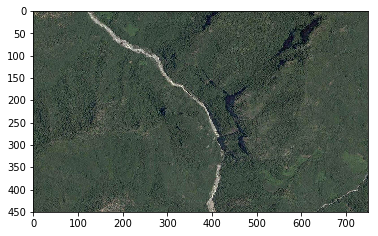

In [18]:
%pylab inline  
import skimage.io as skio

image = skio.imread('IMAGEN_SATELITAL.jpg')
plt.imshow(image)

Scikit image almacenará está imagen como una matriz numpy. Como se trata de una imagen en color, esperamos que la imagen tenga tres dimensiones: dos dimensiones espaciales para las coordenadas x y y de los píxeles y cuatro coordenadas de color para los canales rojo verde, azul y alfa (opacidad) del color.

In [19]:
'shape = %s   dimensions = %s' % (image.shape, image.ndim)

'shape = (450, 750, 3)   dimensions = 3'

### 2. ESCALA DE GRISES

Podemos mapear fácilmente el espacio de color de 3 canales a la escala de grises de 1 canal. Cada color se asigna a un tono de gris usando una transformación estándar de color-2-gris (http://www.poynton.com/PDFs/ColorFAQ.pdf). Scikit-image lo hace muy fácil a través de su módulo skcolor. 

'shape = (450, 750)   dimensions = 2'

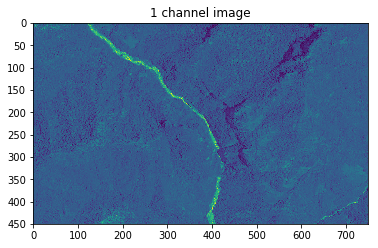

In [20]:
import skimage.color as skcolor

grayimage = skcolor.rgb2gray(image)
plt.imshow(grayimage)
plt.title('1 channel image');
'shape = %s   dimensions = %s' % (grayimage.shape, grayimage.ndim)

El mapa de color utilizado por matplotlib por defecto no es tan útil, y es por eso que la imagen de arriba todavía parece coloreada. Estos son COLORES FALSOS. Vamos a replicar con un mapa de color gris:

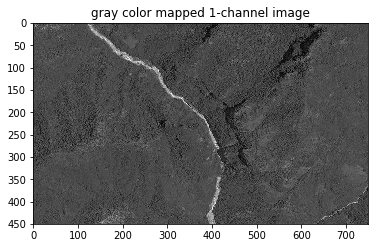

In [12]:
plt.imshow(grayimage, cmap='gray')
plt.title('gray color mapped 1-channel image');

### 3.SEGMENTACIÓN

La segmentación en el campo de la visión artificial es el proceso de dividir una imagen digital en varias partes (grupos de píxeles) u objetos. El objetivo de la segmentación es simplificar y/o cambiar la representación de una imagen en otra más significativa y más fácil de analizar. La segmentación se usa tanto para localizar objetos como para encontrar los límites de estos dentro de una imagen. Más precisamente, la segmentación de la imagen es el proceso de asignación de una etiqueta a cada píxel de la imagen de forma que los píxeles que compartan la misma etiqueta también tendrán ciertas características visuales similares.

 Debido a que elegimos una imagen coloreada, podemos definir esencialmente un filtro de brillo que mantendrá solo los píxeles en un cierto rango de color o escala de grises. Al hacerlo, se vuelve sencillo aislar la carretera de la zona montañosa. Este proceso se llama umbralización. Vamos a trazar el `histograma` del brillo de la imagen:

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6097: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 450 x 750)
  '(shape is %d x %d)' % inp.shape[::-1])


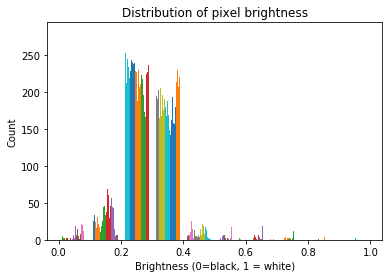

In [16]:
plt.hist(grayimage)
plt.xlabel('Brightness (0=black, 1 = white)')
plt.ylabel('Count')
plt.title('Distribution of pixel brightness');